In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn import set_config

import shap

import pickle


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from sklearn.model_selection import GridSearchCV

import pickle

# pipelines
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# quitar alertas
import warnings
warnings.filterwarnings("ignore")



In [140]:
set_config(transform_output = "pandas")

In [141]:
df = pd.read_csv('/Users/gonzalodelossantos/Desktop/Data/Nuclio/000# Entregables/02# Aprendizaje Supervisado/data/churn - dataset a entrenar.csv')
df_pred = pd.read_csv('/Users/gonzalodelossantos/Desktop/Data/Nuclio/000# Entregables/02# Aprendizaje Supervisado/data/churn - dataset a predecir.csv')
df_variables = pd.read_csv('/Users/gonzalodelossantos/Desktop/Data/Nuclio/000# Entregables/02# Aprendizaje Supervisado/data/churn - diccionario de variables.csv')

In [142]:
target = 'churn'

In [143]:
# ponemos todos los valores en positivo
df['totmrc'] = np.abs(df['totmrc'])
df['avg6rev'] = np.abs(df['avg6rev'])
df['eqpdays'] = np.abs(df['eqpdays'])

df_pred['totmrc'] = np.abs(df['totmrc'])
df_pred['avg6rev'] = np.abs(df['avg6rev'])
df_pred['eqpdays'] = np.abs(df['eqpdays'])

#outlier
change_mou_outlier_idx = df[df['change_mou']>20000].index[0]
df.drop(change_mou_outlier_idx, axis=0, inplace=True)

# borramos infobase
df.drop(columns='infobase', inplace=True)
df_pred.drop(columns='infobase', inplace=True)

# nos guardamos los Customer_ID de df_pred
customer_id_pred = df_pred['Customer_ID']

# borramos Customer_ID
df.drop(columns='Customer_ID', inplace=True)
df_pred.drop(columns='Customer_ID', inplace=True)

In [144]:
# colas pesadas
cols_cola_pesada = ['months', 'eqpdays', 'totmrc', 'mou_cvce']

for col in cols_cola_pesada:
    df[col] = np.sqrt(df[col])
    df_pred[col] = np.sqrt(df_pred[col]) 

In [145]:
# train-test-split
df_train, df_test = train_test_split(df, train_size=0.8, random_state=42)

df_train.reset_index(drop='index', inplace=True)
X_train = df_train.drop(columns=target)
y_train = df_train[target]

df_test.reset_index(drop='index', inplace=True)
X_test = df_test.drop(columns=target)
y_test = df_test[target]

In [146]:
df_test['ethnic'].value_counts(normalize=True)

ethnic
N    0.3362
H    0.1360
S    0.1306
U    0.1087
G    0.0636
Z    0.0533
I    0.0405
O    0.0403
J    0.0305
F    0.0231
B    0.0137
R    0.0117
D    0.0096
M    0.0013
P    0.0009
Name: proportion, dtype: float64

In [147]:
# categoricas booleanas

# asl_flag
X_train['asl_flag'] = X_train['asl_flag'].apply(lambda x: 0 if x=='N' else 1)
X_test['asl_flag'] = X_test['asl_flag'].apply(lambda x: 0 if x=='N' else 1)
df_pred['asl_flag'] = df_pred['asl_flag'].apply(lambda x: 0 if x=='N' else 1)

# refurb_new
X_train['refurb_new'] = X_train['refurb_new'].apply(lambda x: 0 if x=='N' else 1)
X_test['refurb_new'] = X_test['refurb_new'].apply(lambda x: 0 if x=='N' else 1)
df_pred['refurb_new'] = df_pred['refurb_new'].apply(lambda x: 0 if x=='N' else 1)

# kid0_2
X_train['kid0_2'] = X_train['kid0_2'].apply(lambda x: 0 if x=='U' else 1)
X_test['kid0_2'] = X_test['kid0_2'].apply(lambda x: 0 if x=='U' else 1)
df_pred['kid0_2'] = df_pred['kid0_2'].apply(lambda x: 0 if x=='U' else 1)   

# kid3_5
X_train['kid3_5'] = X_train['kid3_5'].apply(lambda x: 0 if x=='U' else 1)
X_test['kid3_5'] = X_test['kid3_5'].apply(lambda x: 0 if x=='U' else 1)
df_pred['kid3_5'] = df_pred['kid3_5'].apply(lambda x: 0 if x=='U' else 1)

# kid6_10
X_train['kid6_10'] = X_train['kid6_10'].apply(lambda x: 0 if x=='U' else 1)
X_test['kid6_10'] = X_test['kid6_10'].apply(lambda x: 0 if x=='U' else 1)
df_pred['kid6_10'] = df_pred['kid6_10'].apply(lambda x: 0 if x=='U' else 1)

# kid11_15
X_train['kid11_15'] = X_train['kid11_15'].apply(lambda x: 0 if x=='U' else 1)
X_test['kid11_15'] = df_test['kid11_15'].apply(lambda x: 0 if x=='U' else 1)
df_pred['kid11_15'] = df_pred['kid11_15'].apply(lambda x: 0 if x=='U' else 1)

# kid16_17
X_train['kid16_17'] = X_train['kid16_17'].apply(lambda x: 0 if x=='U' else 1)
X_test['kid16_17'] = X_test['kid16_17'].apply(lambda x: 0 if x=='U' else 1)
df_pred['kid16_17'] = df_pred['kid16_17'].apply(lambda x: 0 if x=='U' else 1)

# creditcd
X_train['creditcd'] = X_train['creditcd'].apply(lambda x: 0 if x=='N' else 1)
X_test['creditcd'] = X_test['creditcd'].apply(lambda x: 0 if x=='N' else 1)
df_pred['creditcd'] = df_pred['creditcd'].apply(lambda x: 0 if x=='N' else 1)

# NULOS

In [148]:
# df_train_nulos
X_train_nulos = X_train.isna().sum().reset_index(name='nulls')
X_train_nulos[X_train_nulos['nulls']>0].sort_values(by='nulls')

,index,nulls
60,area,183
59,prizm_social_one,2679
66,hnd_webcap,3971
72,income,9028
70,lor,10936
69,ownrent,12333
73,numbcars,18754


In [149]:
# df_test_nulos
X_test_nulos = X_test.isna().sum().reset_index(name='nulls')
X_test_nulos[X_test_nulos['nulls']>0].sort_values(by='nulls')

,index,nulls
60,area,537
59,prizm_social_one,613
66,hnd_webcap,1000
72,income,2284
70,lor,2777
69,ownrent,3113
73,numbcars,4726


In [150]:
# df_pred nulos
df_pred_nulls = df_pred.isna().sum().reset_index(name='nulls')
df_pred_nulls[df_pred_nulls['nulls']>0].sort_values(by='nulls')

,index,nulls
6,roam,25
61,dualband,25
59,prizm_social_one,88
66,hnd_webcap,155
72,income,305
70,lor,390
69,ownrent,427
73,numbcars,676


In [151]:
# lor_cat
def lor_cat(year):
    if pd.isna(year):
        return 'Unknown'
    if year >= 0.0 and year <=3.0:
        return '0-3'
    if year >= 4.0 and year <=6.0:
        return '4-6'
    if year >= 7.0 and year <=9.0:
        return '7-9'
    if year >= 10.0 and year <=12.0:
        return '10-12'
    if year >= 13.0:
        return '13-15'
    return 'Other'

# df_train['lor'] = df_train['lor'].apply(lambda x: lor_cat(x))
# df_test['lor'] = df_test['lor'].apply(lambda x: lor_cat(x))

# X_train['lor'] = X_train['lor'].apply(lambda x: lor_cat(x))
# X_test['lor'] = X_test['lor'].apply(lambda x: lor_cat(x))
# df_pred['lor'] = df_pred['lor'].apply(lambda x: lor_cat(x))

In [152]:
#Separamos el riesgo por categorias más pequeñas con la siguiente función:

def agrupar_crclscod(valor):
    if valor[0] == 'A':
        return 'A'
    elif valor[0] == 'B':
        return 'B'
    else: return 'Higher_Risk'

X_train["crclscod"] = X_train["crclscod"].apply(agrupar_crclscod)
X_test["crclscod"] = X_test["crclscod"].apply(agrupar_crclscod)
df_pred["crclscod"] = df_pred["crclscod"].apply(agrupar_crclscod)

### pipeline para df_train/df_test/df_pred

In [153]:
# borrar area
# X_train.drop(columns='area', inplace=True)
# X_test.drop(columns='area', inplace=True)
# df_pred.drop(columns='area', inplace=True)



# IMPUTE_PIPE 
impute_pipe = ColumnTransformer(
    transformers = [
        ('unknown_impute', SimpleImputer(strategy='constant', fill_value='Unknown'), ['area', 'prizm_social_one', 'hnd_webcap', 'ownrent']),
        ('zero_impute', SimpleImputer(strategy='constant', fill_value=0.0), ['income', 'numbcars', 'lor']),
        ('median_imputer', SimpleImputer(strategy='median'), ['roam']),
        ('most_frequent_imputer', SimpleImputer(strategy='most_frequent'), ['dualband'])
    ],
    remainder='passthrough'
)



#CumsumVarFilter
class CumsumVarFilter(BaseEstimator, TransformerMixin):

    def __init__(self, column, threshold=0.9):
        self.column = column
        self.threshold = threshold
        self.top_values = None

    def fit(self, X, y=None):
        value_counts = X[self.column].value_counts(normalize=True)
        cumsum = value_counts.cumsum()
        self.top_values = cumsum[cumsum < self.threshold].index.tolist()

        return self

    def transform(self, X):
        X = X.copy()
        X[self.column] = X[self.column].apply(lambda x: x if x in self.top_values else 'other')

        return X



#TRANSFORM_PIPE
cols_categoricas = [
    'remainder__crclscod',
    'unknown_impute__prizm_social_one',
    'unknown_impute__area',
    'most_frequent_imputer__dualband',
    'unknown_impute__hnd_webcap',
    'unknown_impute__ownrent',
    'remainder__marital',
    'remainder__ethnic'
    ]

cols_num = [
 'zero_impute__income',
 'zero_impute__numbcars',
 'zero_impute__lor',
 'median_imputer__roam',
 'remainder__rev',
 'remainder__mou',
 'remainder__totmrc',
 'remainder__ovrmou',
 'remainder__ovrrev',
 'remainder__vceovr',
 'remainder__change_mou',
 'remainder__change_rev',
 'remainder__drop_vce',
 'remainder__blck_vce',
 'remainder__blck_dat',
 'remainder__unan_vce',
 'remainder__plcd_vce',
 'remainder__recv_vce',
 'remainder__comp_vce',
 'remainder__comp_dat',
 'remainder__custcare',
 'remainder__ccrndmou',
 'remainder__cc_mou',
 'remainder__inonemin',
 'remainder__threeway',
 'remainder__mou_cvce',
 'remainder__mou_rvce',
 'remainder__owylis_vce',
 'remainder__mouowylisv',
 'remainder__iwylis_vce',
 'remainder__mouiwylisv',
 'remainder__peak_vce',
 'remainder__peak_dat',
 'remainder__mou_peav',
 'remainder__opk_vce',
 'remainder__opk_dat',
 'remainder__mou_opkv',
 'remainder__mou_opkd',
 'remainder__drop_blk',
 'remainder__attempt',
 'remainder__complete',
 'remainder__callwait',
 'remainder__months',
 'remainder__uniqsubs',
 'remainder__actvsubs',
 'remainder__asl_flag',
 'remainder__totcalls',
 'remainder__totmou',
 'remainder__totrev',
 'remainder__adjrev',
 'remainder__adjmou',
 'remainder__adjqty',
 'remainder__avgrev',
 'remainder__avgmou',
 'remainder__avgqty',
 'remainder__avg3mou',
 'remainder__avg3qty',
 'remainder__avg3rev',
 'remainder__avg6mou',
 'remainder__avg6qty',
 'remainder__avg6rev',
 'remainder__refurb_new',
 'remainder__hnd_price',
 'remainder__phones',
 'remainder__models',
 'remainder__truck',
 'remainder__rv',
 'remainder__forgntvl',
 'remainder__kid0_2',
 'remainder__kid3_5',
 'remainder__kid6_10',
 'remainder__kid11_15',
 'remainder__kid16_17',
 'remainder__creditcd',
 'remainder__eqpdays'
]

transform_pipe = ColumnTransformer(
    transformers = [
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cols_categoricas),
        ('scaler', StandardScaler(), cols_num)
    ],
    remainder='passthrough'
)




#ALTA CORRELACION
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class AltaCorrelacion(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.9, target='churn'):
        self.threshold = threshold
        self.target = target
        self.cols_to_drop_ = []

    def fit(self, X, y):
        # Merge X and y como en tu función original
        df = X.copy()
        y_named = y.rename(self.target) if y.name != self.target else y
        df = df.merge(y_named, left_index=True, right_index=True)

        # Correlación
        df_corr = df.corr(numeric_only=True)

        # Triángulo superior
        df_triangulo = pd.DataFrame(np.triu(df_corr, k=1), columns=df_corr.columns)
        df_triangulo.index = df_corr.columns

        # Apilamos
        cols = ['variable1', 'variable2', 'correlacion']
        df_stack = df_triangulo.stack().reset_index()
        df_stack.columns = cols

        # Correlaciones > threshold
        df_altas = df_stack[df_stack['correlacion'] > self.threshold]

        # Correlación con el target
        corr_con_target = df_corr[self.target]

        df_altas['corr_var1_target'] = df_altas['variable1'].apply(lambda x: corr_con_target[x])
        df_altas['corr_var2_target'] = df_altas['variable2'].apply(lambda x: corr_con_target[x])
        df_altas['var_menos_corr'] = df_altas.apply(
            lambda row: row['variable1'] if np.abs(row['corr_var1_target']) > np.abs(row['corr_var2_target']) 
            else row['variable2'], axis=1
        )

        # Guardamos las columnas a eliminar
        self.cols_to_drop_ = list(set(df_altas['var_menos_corr']))
        print(f'Eliminamos {len(self.cols_to_drop_)} variables con alta correlacion\n')
        return self

    def transform(self, X):
        X_copy = X.copy()
        return X_copy.drop(columns=self.cols_to_drop_, errors='ignore')
    



#BAJA VARIANZA
class BajaVarianza(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.cols_to_drop_ = []

    def fit(self, X, y=None):
        self.cols_to_drop_ = [col for col in X.columns if X[col].var() < self.threshold]
        print(f'Eliminamos {len(self.cols_to_drop_)} columnas con poca varianza')
        return self

    def transform(self, X):
        print(f'Nos quedamos con {X.shape[1] - len(self.cols_to_drop_)} columnas')
        return X.drop(columns=self.cols_to_drop_, errors='ignore')
    



#PIPELINE  
pipe = Pipeline(
    steps = [
        ('impute', impute_pipe),
        ('cumsum_crclscod', CumsumVarFilter(column='remainder__crclscod', threshold=0.9)),
        ('cumsum_ethnic', CumsumVarFilter(column='remainder__ethnic', threshold=0.9)),
        ('transform', transform_pipe),
        ('alta_correlacion', AltaCorrelacion(threshold=0.9)),
        ('baja_varianza', BajaVarianza(threshold=0.05)),
        ('model', CatBoostClassifier(verbose=False))
    ]
)

pipe.fit(X_train, y_train)

y_test_pred = pipe.predict(X_test)

print(f'f1_score (X_test): {f1_score(y_test, y_test_pred)}')

Eliminamos 19 variables con alta correlacion

Eliminamos 18 columnas con poca varianza
Nos quedamos con 89 columnas
Nos quedamos con 89 columnas
f1_score (X_test): 0.8396624472573839


Nos quedamos con 89 columnas
Nos quedamos con 89 columnas


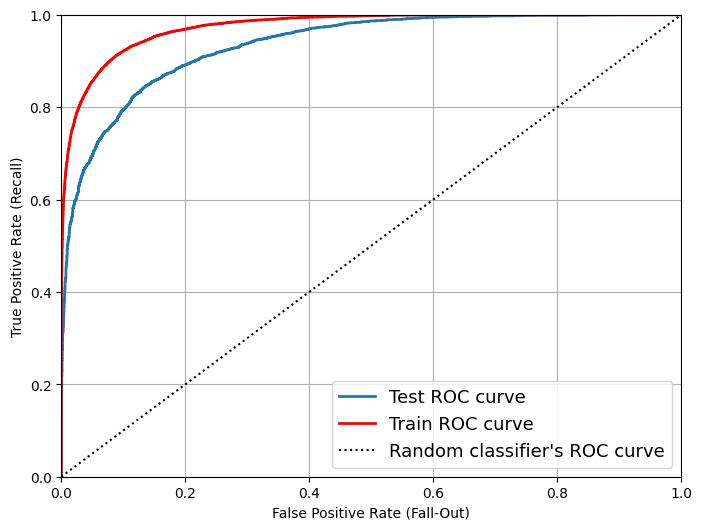

In [155]:
y_test_predict_proba = pipe.predict_proba(X_test)[:,1]
y_train_predict_proba = pipe.predict_proba(X_train)[:,1]

# ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_proba)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label="Test ROC curve")
plt.plot(fpr_train, tpr_train, linewidth=2, label="Train ROC curve", color='r')
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [156]:
pipe

Pipeline(steps=[('impute',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('unknown_impute',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant'),
                                                  ['area', 'prizm_social_one',
                                                   'hnd_webcap', 'ownrent']),
                                                 ('zero_impute',
                                                  SimpleImputer(fill_value=0.0,
                                                                strategy='constant'),
                                                  ['income', 'numbcars',
                                                   'lor']),
                                                 ('median_imputer',
                                                  SimpleImputer(strategy='median...
                                                   'remainder__custcare',
                                                   'remainder__ccrndmou',
                                                   'remainder__cc_mou',
                                                   'remainder__inonemin',
                                                   'remainder__threeway',
                                                   'remainder__mou_cvce',
                                                   'remainder__mou_rvce',
                                                   'remainder__owylis_vce',
                                                   'remainder__mouowylisv',
                                                   'remainder__iwylis_vce', ...])])),
                ('alta_correlacion', AltaCorrelacion()),
                ('baja_varianza', BajaVarianza()),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x16ba57a70>)])

In [157]:
#eliminar columnas sin imp para el modelo
#undersampler

In [158]:
# guardar pipe

with open('churn_pipeline.pkl', 'wb') as f:
    pickle.dump(pipe, f) 